In [1]:
import NNclassification as NNC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [2]:
# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

def accuracy(y,y_pred):
    y = np.argmax(y, axis=1) #Returns one-hot encoded vectors back to class integers
    acc = np.sum(y==y_pred)/len(y)
    return acc

In [3]:
# Load the data
cancer = load_breast_cancer()
X = cancer.data[:,:24]
y = cancer.target
X = (X -np.mean(X))/np.sqrt(np.var(X))
Y = to_categorical_numpy(y)


In [4]:
n_categories = Y.shape[1]
n_features = X.shape[1]
print("Number of categories:", n_categories)
print("Number of features:", n_features)

Number of categories: 2
Number of features: 24


In [5]:
hidden_layers = [('relu',0),('relu',0.01),'softmax']
#hidden_layers = ['sigmoid','sigmoid','softmax']
layer_dims=[n_features,6,4,n_categories]
NNclassifier = NNC.NN(layer_dims=layer_dims,hidden_layers=hidden_layers , cost_function="CrossEntropy", optimization_method = "Adam",
           batch_size = 32, max_epoch=1000, verbose=1, learning_rate=0.1)

In [6]:
NNclassifier.fit(X.T,Y.T)

Initilizing Weights...
Starting Training...
Cost function after epoch 100: 0.1383811737818825
Cost function after epoch 200: 0.1289219481390706
Cost function after epoch 300: 0.11022663163575193
Cost function after epoch 400: 0.14729348546822021
Cost function after epoch 500: 0.1128222836956983
Cost function after epoch 600: 0.10988015487549245
Cost function after epoch 700: 0.10929088440743957
Cost function after epoch 800: 0.11076578540811992
Cost function after epoch 900: 0.11073628478045967
Cost function after epoch 1000: 0.10989194735972746


In [7]:
Y_tilde = NNclassifier.predict(X.T)

Text(0, 0.5, 'Cost/loss')

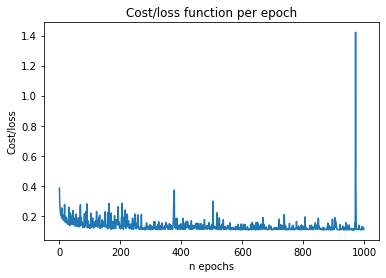

In [8]:
plt.plot(NNclassifier.costs)
plt.title("Cost/loss function per epoch")
plt.xlabel("n epochs")
plt.ylabel("Cost/loss")

In [9]:
accuracy(Y, Y_tilde)

0.9472759226713533

# Loading the MNISt data base
## There are 1797 images of size 8x8 pixels in "grayscale"

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


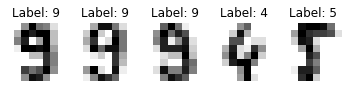

In [10]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)


for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


In [11]:
X = inputs
Y = to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [12]:
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

## Setting up the NN for classification

In [13]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = NNC.NN(layer_dims=layer_dims, hidden_layers=hidden_layers, cost_function='CrossEntropy', optimization_method = "SGDM", 
                      batch_size = 32, max_epoch=100, verbose=1, learning_rate=0.05)

In [14]:
NNclassifier.fit(X_train, Y_train)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 1.5784695235426394
Cost function after epoch 20: 0.8362230262658619
Cost function after epoch 30: 0.4709171764894603
Cost function after epoch 40: 0.4283560504454587
Cost function after epoch 50: 0.357501140525463
Cost function after epoch 60: 0.2808997397950939
Cost function after epoch 70: 0.14948341518112737
Cost function after epoch 80: 0.09462491947873711
Cost function after epoch 90: 0.06774613782274083
Cost function after epoch 100: 0.05239845873297438


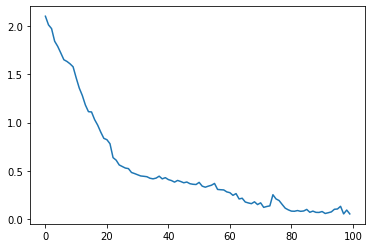

In [15]:
plt.plot(NNclassifier.costs)

In [16]:
Y_tilde = NNclassifier.predict(X_train)
Y_pred = NNclassifier.predict(X_test)

In [17]:
Y_train.shape, Y_tilde.shape

((10, 1437), (1437,))

In [18]:
accuracy(Y_train.T, Y_tilde)

0.988865692414753

In [19]:
accuracy(Y_test.T, Y_pred)

0.9416666666666667

# Sidenote: Using the same class for regression:

In [27]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [28]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x, y = np.meshgrid(x,y) 
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

In [29]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) # Reshaping the ground truth to be able to fit through the network.

In [30]:
n_features = X.shape[0]
n_categories = 1

In [31]:
n_features

2

In [37]:
NNregression = NNC.NN(layer_dims=[X.shape[0],10,10,1], hidden_layers=["sigmoid","sigmoid","linear"], cost_function="MSE", 
                      optimization_method = "SGDM", batch_size = 10, max_epoch=1000, verbose=1, learning_rate=0.05)

In [38]:
NNregression.fit(X,z)

Initilizing Weights...
Starting Training...
Cost function after epoch 100: 76.67408210570794
Cost function after epoch 200: 33.57825728073891
Cost function after epoch 300: 31.309859911433588
Cost function after epoch 400: 29.38063947449811
Cost function after epoch 500: 25.874558525007302
Cost function after epoch 600: 23.086168522968634
Cost function after epoch 700: 15.188831474898421
Cost function after epoch 800: 12.827028229632683
Cost function after epoch 900: 11.742032472314131
Cost function after epoch 1000: 11.081447031986535


Text(0.5, 0, 'Epochs')

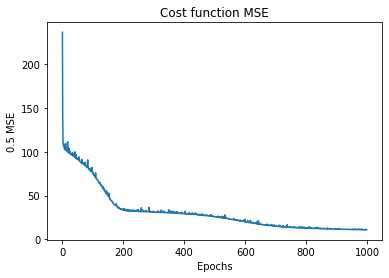

In [39]:
plt.plot(NNregression.costs)
plt.title("Cost function MSE")
plt.ylabel("0.5 MSE")
plt.xlabel("Epochs")

In [40]:
z_pred = NNregression.predict(X, proba=True)

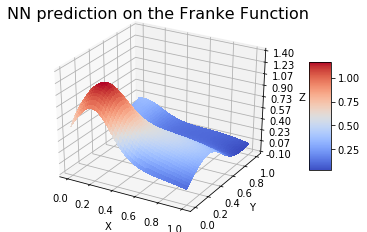

In [41]:
z_pred_surf = z_pred.reshape(datapoints,datapoints)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z_pred_surf, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

# Labeling the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("NN prediction on the Franke Function", fontsize = 16)
ax.set_zlim(-0.10, 1.40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()